In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load DataFrames

In [2]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


** make 'datetime' column separate **

In [3]:
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## Data 시각화 

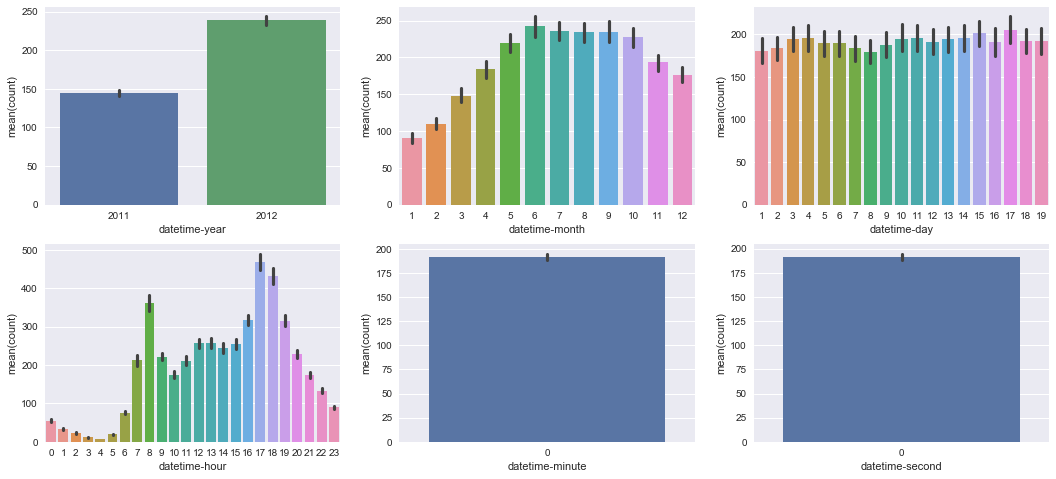

In [5]:
import seaborn as sns

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

* train 데이터와 test 데이터는 day를 기준으로 나눈거라, 'datetime-day'는 사용 불가
* minute와 second는 데이터가 없어서 배재

*** year, month, hour 만 따로 데이터 시각화 ***

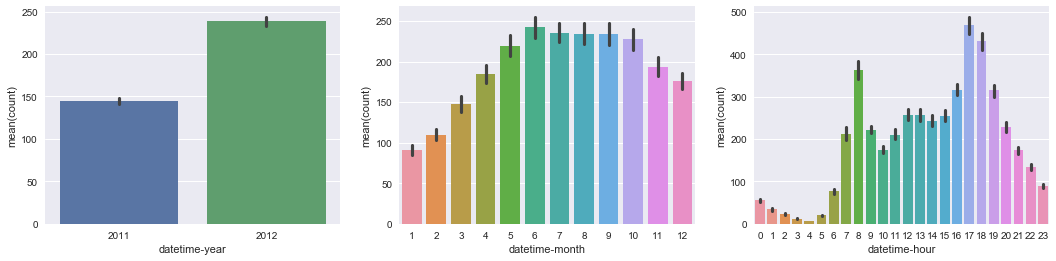

In [6]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax3)

* 위 데이터만 봤을 때, 2011년보다 2012년의 대여횟수가 더 많음
* monthly로 확인 했을 때, 1월부터 점점 증가하여, 6-10월에 대여횟수가 가장 많음
* 시간별로 확인 했을 때, 출퇴근 시간의 대여횟수가 눈에 띄게 올라감

## datatime-hour 파헤치기

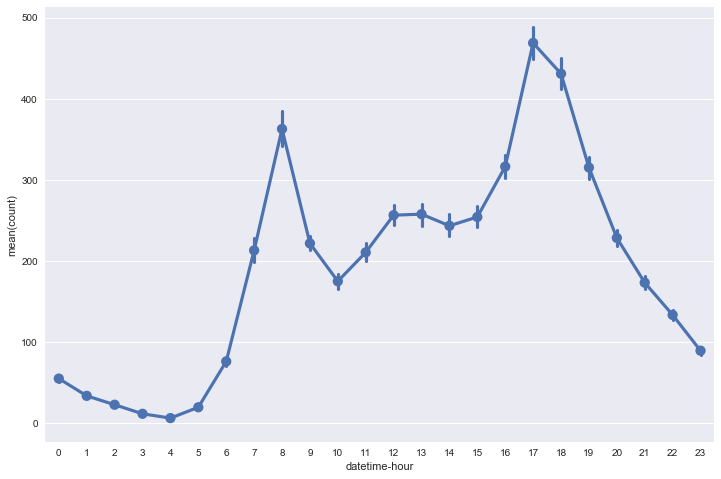

In [7]:
# sns.pointplot(data=train, x='datetime-hour', y='count', hue='season')
plt.figure(figsize=(12,8))
sns.pointplot(data=train, x='datetime-hour', y='count', )

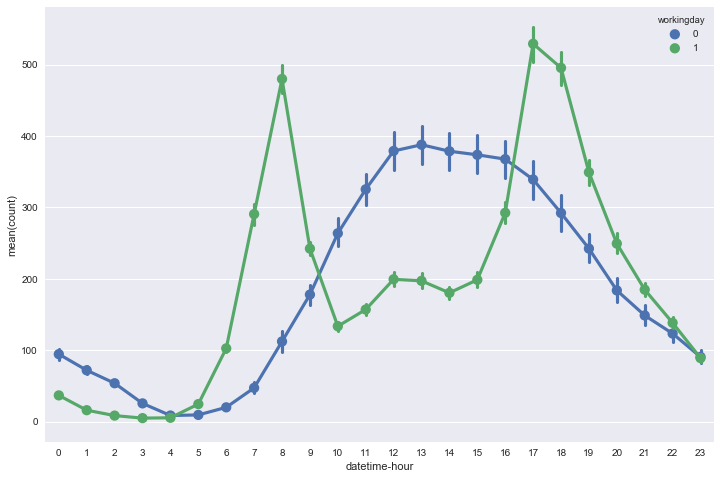

In [8]:
plt.figure(figsize=(12,8))
sns.pointplot(data=train, x='datetime-hour', y='count', hue='workingday')

* 위 데이터를 보면, workingday에는 출근시간(7-8시)과 퇴근시간(18-19시)의 비중이 높음
* workingday를 제외한 날에는 오후 시간대의 대여양이 많음을 알 수 있음

## 평일과 주말로 나누고, 요일별로 인코딩

In [9]:
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek
train[['datetime', 'datetime-dayofweek']].head()

,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


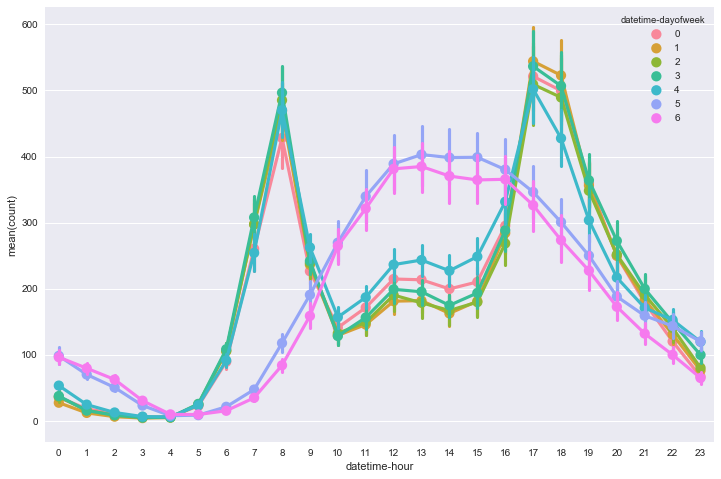

In [10]:
plt.figure(figsize=(12,8))
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek")

## 년도와 월 합치기

In [11]:
def concat_year_month(datetime):
    return '{}-{}'.format(datetime.year, datetime.month)

train['datetime-year-month'] = train['datetime'].apply(concat_year_month)

** 년별, 월별 그리고 년월을 합친 컬럼을 다시 분석 **

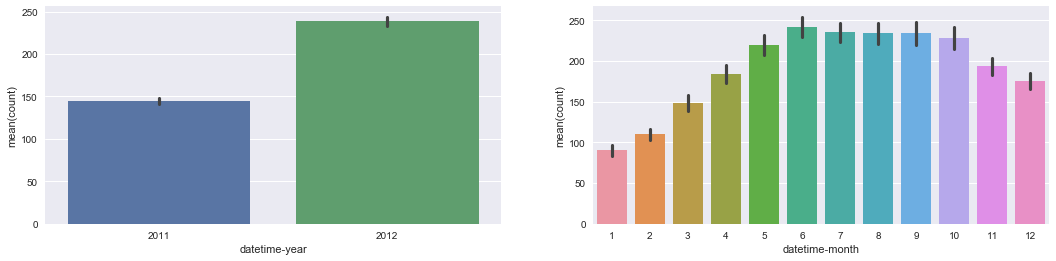

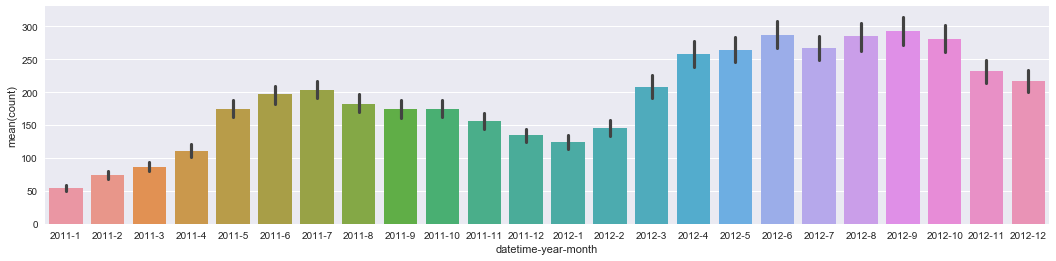

In [12]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, (ax3) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="datetime-year-month", y="count", ax=ax3)

** distplot of count **

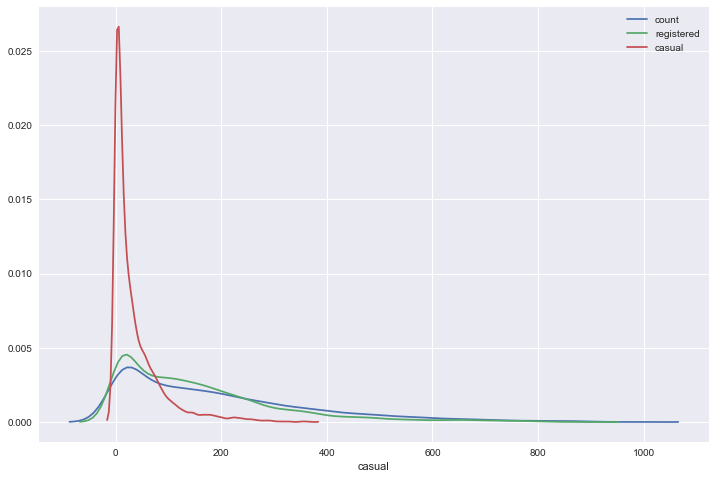

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(train['count'], hist=False, label='count')
sns.distplot(train['registered'], hist=False, label='registered')
sns.distplot(train['casual'], hist=False, label='casual')
plt.legend()

## Reload DataFrames

In [14]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv', parse_dates=['datetime'])

train.head()
test.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


## Pre-processing

** Parse Datetime **

In [15]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

In [16]:
train[['datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second']].head()

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [17]:
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second

In [18]:
test[['datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second']].head()

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,20,0,0,0
1,2011,1,20,1,0,0
2,2011,1,20,2,0,0
3,2011,1,20,3,0,0
4,2011,1,20,4,0,0


** Concatenate Year and Month **

In [19]:
train['datetime-year-month'] = train['datetime'].apply(concat_year_month)

In [20]:
train_year_month = pd.get_dummies(train['datetime-year-month'], prefix="datetime")

In [21]:
train = pd.concat([train, train_year_month], axis=1)

In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test['datetime-year-month'] = test['datetime'].apply(concat_year_month)
test_year_month = pd.get_dummies(test['datetime-year-month'], prefix="datetime")
test = pd.concat([test, test_year_month], axis=1)

print(test.shape)
test.head()

(6493, 40)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0


## Parse DayofWeek

In [24]:
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

In [25]:
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

* Day of Week 컬럼 인코딩, get_dummies
* 인코딩 후 Concatenate

In [26]:
train_dayofweek = pd.get_dummies(train['datetime-dayofweek'], prefix='datetime-dayofweek')

In [27]:
train = pd.concat([train, train_dayofweek], axis=1)
print(train.shape)
train.head()

(10886, 51)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-8,datetime_2012-9,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,5,0,0,0,0,0,1,0


* test data

In [28]:
test_dayofweek = pd.get_dummies(test['datetime-dayofweek'], prefix='datetime-dayofweek')

In [29]:
test = pd.concat([test, test_dayofweek], axis=1)

print(test.shape)
test.head()

(6493, 48)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-8,datetime_2012-9,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,3,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0


## Season 인코딩하기

In [30]:
train_season = pd.get_dummies(train['season'], prefix='season_incode')
print(train_season.shape)
train_season.head()

(10886, 4)


,season_incode_1,season_incode_2,season_incode_3,season_incode_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


* concatenate train with train_season

In [31]:
train = pd.concat([train, train_season], axis=1)
print(train.shape)
train.head()

(10886, 55)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_incode_1,season_incode_2,season_incode_3,season_incode_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,1,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,1,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,1,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,1,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,1,0,1,0,0,0


* test data

In [32]:
test_season = pd.get_dummies(test['season'], prefix='season_incode')

In [33]:
test = pd.concat([test, test_season], axis=1)
print(test.shape)
test.head()

(6493, 52)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,season_incode_1,season_incode_2,season_incode_3,season_incode_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,1,0,0,0,1,0,0,0


## 날씨 데이터 인코딩

In [34]:
train_weather = pd.get_dummies(train['weather'], prefix='weather-incode')
print(train_weather.shape)
train_weather.head()

(10886, 4)


,weather-incode_1,weather-incode_2,weather-incode_3,weather-incode_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


* 인코딩한 날씨데이터 합치기

In [35]:
train = pd.concat([train, train_weather], axis=1)
print(train.shape)
train.head()

(10886, 59)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-dayofweek_5,datetime-dayofweek_6,season_incode_1,season_incode_2,season_incode_3,season_incode_4,weather-incode_1,weather-incode_2,weather-incode_3,weather-incode_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,0,1,0,0,0,1,0,0,0


* test date

In [36]:
test_weather = pd.get_dummies(test['weather'], prefix='weather-incode')
print(test_weather.shape)
test_weather.head()

(6493, 4)


,weather-incode_1,weather-incode_2,weather-incode_3,weather-incode_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [37]:
test = pd.concat([test, test_weather], axis=1)
print(test.shape)
test.head()

(6493, 56)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-dayofweek_5,datetime-dayofweek_6,season_incode_1,season_incode_2,season_incode_3,season_incode_4,weather-incode_1,weather-incode_2,weather-incode_3,weather-incode_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,1,0,0,0,1,0,0,0


## windspeed 비값 채우기

In [38]:
train["prev-windspeed"] = train["windspeed"].shift(-1)
train["next-windspeed"] = train["windspeed"].shift(1)

train['next-windspeed'] = train['next-windspeed'].fillna(value = 0)

train[["prev-windspeed", "windspeed", "next-windspeed"]].head(5)

,prev-windspeed,windspeed,next-windspeed
0,0.0000,0.0,0.0
1,0.0000,0.0,0.0
2,0.0000,0.0,0.0
3,0.0000,0.0,0.0
4,6.0032,0.0,0.0


In [39]:
train["windspeed-interpolate"] = (train["prev-windspeed"] + train["next-windspeed"] ) / 2

print(train.shape)
train[["prev-windspeed", "windspeed", "next-windspeed", "windspeed-interpolate"]].head(20)

(10886, 62)


,prev-windspeed,windspeed,next-windspeed,windspeed-interpolate
0,0.0000,0.0000,0.0000,0.00000
1,0.0000,0.0000,0.0000,0.00000
2,0.0000,0.0000,0.0000,0.00000
3,0.0000,0.0000,0.0000,0.00000
4,6.0032,0.0000,0.0000,3.00160
5,0.0000,6.0032,0.0000,0.00000
6,0.0000,0.0000,6.0032,3.00160
7,0.0000,0.0000,0.0000,0.00000
8,0.0000,0.0000,0.0000,0.00000
9,16.9979,0.0000,0.0000,8.49895


In [40]:
train.loc[train["windspeed"] == 0, "windspeed"] = train.loc[train["windspeed"] == 0, "windspeed-interpolate"]

** test data **

In [41]:
test['prev-windspeed'] = test['windspeed'].shift(-1)
test['next-windspeed'] = test['windspeed'].shift(1)

# NaN 값에 0 채우기
test['next-windspeed'] = test['next-windspeed'].fillna(value = 0)

In [42]:
test['windspeed-interpolate'] = (test['prev-windspeed'] + test['next-windspeed']) / 2
test.loc[test['windspeed'] == 0, 'windspeed'] = test.loc[test['windspeed'] == 0, 'windspeed-interpolate']

In [43]:
test['windspeed'].unique()

array([ 26.0027 ,  13.00135,   5.5007 ,  11.0014 ,  15.0013 ,  19.0012 ,
        19.9995 ,   9.00145,   7.0015 ,   8.9981 ,  12.998  ,  22.0028 ,
        16.9979 ,   6.0032 ,  27.9993 ,  23.9994 ,  31.0009 ,  39.0007 ,
        35.0008 ,  30.0026 ,   9.99975,   6.50235,   3.0016 ,   0.     ,
         4.49905,   3.50075,   9.99975,   6.499  ,   7.9998 ,  36.9974 ,
         7.50065,  15.50045,   8.49895,   8.5023 ,  40.9973 ,  54.002  ,
        50.0021 ,  32.9975 ,  12.5022 ,  43.0006 ,  19.50035,  17.99955,
        17.00125,  21.00115,  10.99805,  11.9997 ,  11.50055,  13.99965,
        15.9996 ,  13.5005 ,  25.00105,   9.5006 ,  10.50225,   9.5006 ,
        12.998  ,  55.9986 ,  13.99965,  14.4988 ,  22.50195,  46.0022 ,
        43.9989 ,  21.5003 ,  25.99935,  18.4987 ,  16.49875,  20.502  ,
        14.003  ])

## 학습시키기 

In [44]:
feature_names = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "datetime-hour"]

feature_names = feature_names + list(train_year_month.columns)
feature_names = feature_names + list(train_dayofweek.columns)
feature_names = feature_names + list(train_season.columns)
feature_names = feature_names + list(train_weather.columns)

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-hour',
 'datetime_2011-1',
 'datetime_2011-10',
 'datetime_2011-11',
 'datetime_2011-12',
 'datetime_2011-2',
 'datetime_2011-3',
 'datetime_2011-4',
 'datetime_2011-5',
 'datetime_2011-6',
 'datetime_2011-7',
 'datetime_2011-8',
 'datetime_2011-9',
 'datetime_2012-1',
 'datetime_2012-10',
 'datetime_2012-11',
 'datetime_2012-12',
 'datetime_2012-2',
 'datetime_2012-3',
 'datetime_2012-4',
 'datetime_2012-5',
 'datetime_2012-6',
 'datetime_2012-7',
 'datetime_2012-8',
 'datetime_2012-9',
 'datetime-dayofweek_0',
 'datetime-dayofweek_1',
 'datetime-dayofweek_2',
 'datetime-dayofweek_3',
 'datetime-dayofweek_4',
 'datetime-dayofweek_5',
 'datetime-dayofweek_6',
 'season_incode_1',
 'season_incode_2',
 'season_incode_3',
 'season_incode_4',
 'weather-incode_1',
 'weather-incode_2',
 'weather-incode_3',
 'weather-incode_4']

In [45]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 48)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime-dayofweek_5,datetime-dayofweek_6,season_incode_1,season_incode_2,season_incode_3,season_incode_4,weather-incode_1,weather-incode_2,weather-incode_3,weather-incode_4
0,1,0,0,1,9.84,14.395,81,0.0000,0,1,...,1,0,1,0,0,0,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,1,1,...,1,0,1,0,0,0,1,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,2,1,...,1,0,1,0,0,0,1,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,1,...,1,0,1,0,0,0,1,0,0,0
4,1,0,0,1,9.84,14.395,75,3.0016,4,1,...,1,0,1,0,0,0,1,0,0,0


In [46]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 48)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime-dayofweek_5,datetime-dayofweek_6,season_incode_1,season_incode_2,season_incode_3,season_incode_4,weather-incode_1,weather-incode_2,weather-incode_3,weather-incode_4
0,1,0,1,1,10.66,11.365,56,26.00270,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,1,1,10.66,13.635,56,13.00135,1,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,1,10.66,13.635,56,5.50070,2,1,...,0,0,1,0,0,0,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.00140,3,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,1,1,10.66,12.880,56,11.00140,4,1,...,0,0,1,0,0,0,1,0,0,0


** casual 컬럼과 registered 컬럼 별로 예측 모델 만들기 **

In [57]:
label_name = 'registered'

y_train = train[label_name]

In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 101)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=101,
           verbose=0, warm_start=False)

## Score

In [59]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [60]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, \
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.43427


In [61]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=101,
           verbose=0, warm_start=False)

In [62]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([  8.6,   3.2,   1.8, ...,  65.9,  44.3,  34. ])

## Submit

* casual Submit

In [55]:
submission = pd.read_csv("sampleSubmission.csv")

submission["casual"] = predictions

print(submission.shape)
submission.head()

(6493, 3)


,datetime,count,casual
0,2011-01-20 00:00:00,0,2.0
1,2011-01-20 01:00:00,0,0.6
2,2011-01-20 02:00:00,0,1.4
3,2011-01-20 03:00:00,0,0.2
4,2011-01-20 04:00:00,0,0.2


In [56]:
submission.to_csv('casual.csv', index=False)

* registered Submit

In [65]:
submission = pd.read_csv("sampleSubmission.csv")

submission["registered"] = predictions

print(submission.shape)
submission.head()

(6493, 3)


,datetime,count,registered
0,2011-01-20 00:00:00,0,8.6
1,2011-01-20 01:00:00,0,3.2
2,2011-01-20 02:00:00,0,1.8
3,2011-01-20 03:00:00,0,2.1
4,2011-01-20 04:00:00,0,2.2


In [66]:
submission.to_csv('registered.csv', index=False)

In [67]:
df1 = pd.read_csv('casual.csv')
df2 = pd.read_csv('registered.csv')

* casual과 registered submit을 합치기

In [79]:
df1['count'] = df1['casual'] + df2['registered']

In [87]:
df1.drop('casual', 1, inplace=True)
df1.head()

,datetime,count
0,2011-01-20 00:00:00,10.6
1,2011-01-20 01:00:00,3.8
2,2011-01-20 02:00:00,3.2
3,2011-01-20 03:00:00,2.3
4,2011-01-20 04:00:00,2.4


In [88]:
df1.to_csv('feed_weather.csv', index=False)